In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/FundDataWithMonthlyReturnsTSNEScoredScaledClustered.csv')

In [3]:
cluster_cov = data.groupby('cluster').mean() * 100  # data is in pct
cluster_cov = cluster_cov.loc[:, '2015-02-28':'2021-01-31'].T.cov()
cluster_cov

cluster,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,0.780662,0.588936,1.064913,1.929828,3.124154,0.043513,2.001220,0.775171,0.351817,0.943552
1,0.588936,19.300996,4.344940,5.174809,14.466742,0.019838,10.180684,5.202369,13.766962,12.431424
2,1.064913,4.344940,6.020586,6.517531,4.286898,0.033582,14.010491,2.541193,5.108188,5.434112
3,1.929828,5.174809,6.517531,26.820200,17.060786,0.058555,22.160668,4.581684,7.850423,9.682319
4,3.124154,14.466742,4.286898,17.060786,89.825057,0.142471,20.224777,5.889246,9.249828,13.047175
5,0.043513,0.019838,0.033582,0.058555,0.142471,0.007512,0.053297,0.034121,-0.035618,0.025150
6,2.001220,10.180684,14.010491,22.160668,20.224777,0.053297,51.345699,6.184698,12.524889,14.633637
7,0.775171,5.202369,2.541193,4.581684,5.889246,0.034121,6.184698,2.157285,4.360243,4.371465
8,0.351817,13.766962,5.108188,7.850423,9.249828,-0.035618,12.524889,4.360243,16.141834,10.812989


In [4]:
expected_ann_return = data.groupby('cluster')[['ann_return']].mean()
expected_ann_volatility = data.groupby('cluster')[['ann_stdev']].mean()

In [8]:
n = int(1e5)
weights = np.array(np.random.random((n, len(expected_ann_return))))
weights = weights/weights.sum(1).reshape(-1, 1)
returns = np.sum(weights * expected_ann_return.values.ravel(), axis=1)

In [10]:
volatilities = np.zeros(n)
for i in range(n):
    volatilities[i] += np.sqrt(np.dot(weights[i, :].T, np.dot(cluster_cov * 12, weights[i, :])))

In [15]:
sharpes = returns / volatilities

In [16]:
#the optimal portfolio is located in this point.
print('Max sharpe ratio in the array: {}'.format(sharpes.max()))
print('Location in the array: {}'.format(sharpes.argmax()))

Max sharpe ratio in the array: 0.7289977220279922
Location in the array: 36619


In [24]:
#the weight of the optimal portfolio is:
print(weights[sharpes.argmax(),:] * 100)

[1.93801409e+01 1.54632641e+01 1.67258790e+01 2.41564099e+00
 1.26663945e-02 2.57531088e+01 1.93704180e+00 1.58467061e+01
 9.83809533e-01 1.48174231e+00]


In [26]:
max_sr_ret=returns[sharpes.argmax()]
max_sr_vol=volatilities[sharpes.argmax()]

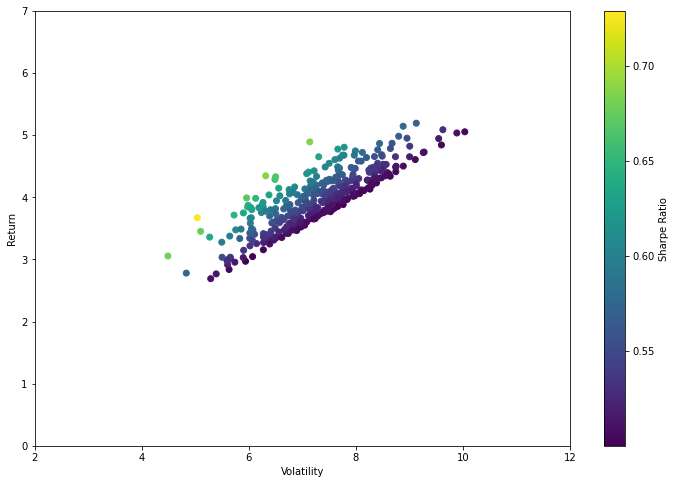

In [61]:
mask = sharpes > .5

plt.figure(figsize=(12,8))
plt.scatter(volatilities[mask], returns[mask], c=sharpes[mask], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.ylim(0, 7)
plt.xlim(2, 12)
plt.show()